In [61]:
import numpy as np
from matplotlib import pyplot as plt
import gzip
import pandas as pd
from seaborn import color_palette,palplot
%matplotlib inline

In [17]:
#idx = {i:line.strip() for i,line in enumerate(gzip.open('/Users/jaredlorince/Desktop/uid_indices_test.txt.gz'))}
idx = [line.strip() for line in gzip.open('/Users/jaredlorince/Desktop/uid_indices_test.txt.gz')]

In [206]:
cats = pd.read_table('/Users/jaredlorince/Desktop/subjects_2015.txt.gz',compression='gzip',header=None,names=['uid','heading','subheading','categories'])
cats['categories'] = cats['categories'].fillna('')
metadata = pd.read_table('/Users/jaredlorince/Desktop/metadata_2015.txt.gz',compression='gzip',header=None,names=['uid','date','pubtype','volume','issue','pages','paper_title','source_title','doctype'],parse_dates=['date'])
kw = pd.read_table('/Users/jaredlorince/Desktop/keywords_2015.txt.gz',compression='gzip',header=None,names=['uid','n_keywords','keywords'],quoting=3)
kw['keywords'] = kw['keywords'].fillna('')

In [207]:
cats = cats.set_index('uid').reindex(idx)
metadata = metadata.set_index('uid').reindex(idx)
kw = kw.set_index('uid').reindex(idx)

In [229]:
x = np.loadtxt('/Users/jaredlorince/Desktop/output_p25')
x_normed = np.loadtxt('/Users/jaredlorince/Desktop/output_normed_p25')

In [230]:
df_x = pd.DataFrame({'x':x[:,0],'y':x[:,1],'uid':idx}).join(cats,on='uid',how='left').join(metadata,on='uid',how='left')
df_xnorm = pd.DataFrame({'x':x_normed[:,0],'y':x_normed[:,1],'uid':idx}).join(cats,on='uid',how='left').join(metadata,on='uid',how='left')

In [231]:
df_x['first_cat'] = df_x['categories'].apply(lambda x: x.split('|')[0])
df_xnorm['first_cat'] = df_xnorm['categories'].apply(lambda x: x.split('|')[0])

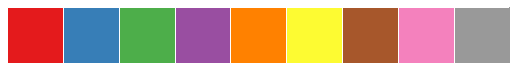

In [232]:
# values = cats['subheading'].dropna().unique()
# color_dict = dict(zip(values,color_palette(n_colors=len(values))))
# pc = []
# for k,v in color_dict.iteritems():
#     print k,v
#     pc.append(v)
# palplot(pc)
# df_x['color'] = df_x['subheading'].apply(lambda x: color_dict.get(x))
# df_xnorm['color'] = df_x['subheading'].apply(lambda x: color_dict.get(x))

values = df_x['first_cat'].value_counts()[:9].index
color_dict = dict(zip(values,color_palette('Set1',n_colors=len(values))))
pc = []
for k in values:
    pc.append(color_dict[k])
palplot(pc)
df_x['color'] = df_x['first_cat'].apply(lambda x: color_dict.get(x))
df_xnorm['color'] = df_x['first_cat'].apply(lambda x: color_dict.get(x))

# values = df_x['source_title'].value_counts().index[:10]
# color_dict = dict(zip(values,color_palette('Set1',n_colors=len(values))))
# pc = []
# for k,v in color_dict.iteritems():
#     print k,v
#     pc.append(v)
# palplot(pc)
# df_x['color'] = df_x['source_title'].apply(lambda x: color_dict.get(x))
# df_xnorm['color'] = df_x['source_title'].apply(lambda x: color_dict.get(x))

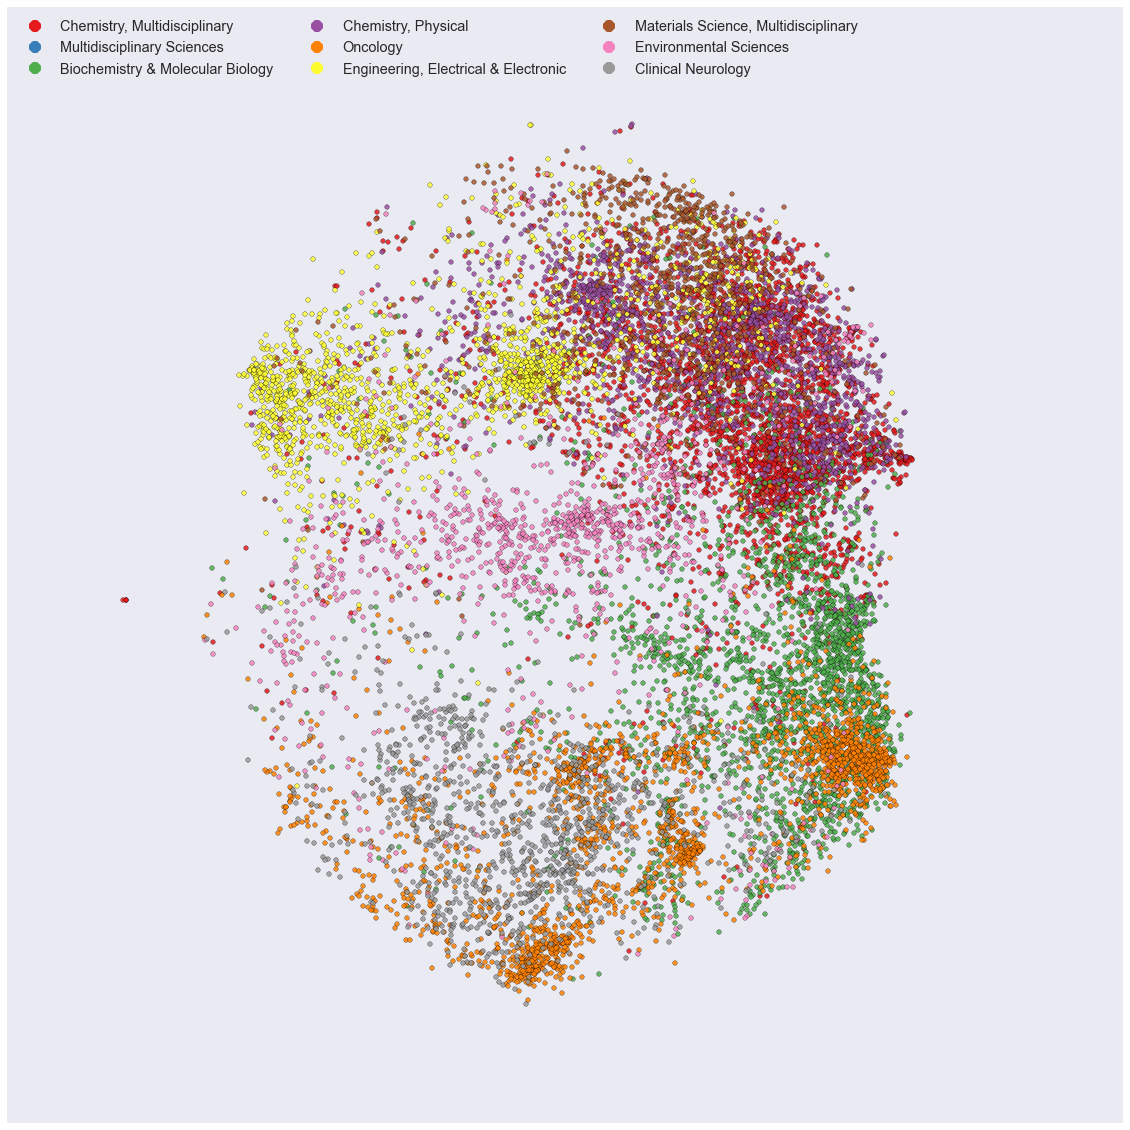

In [233]:
plt_df = df_x.dropna()
fig,ax = plt.subplots(1,1,figsize=(20,20))
markers = ['.','*']
marker_idx=0
for i,g in enumerate(values):
    if (i%9==0) and (i>0):
        marker_idx+=1
    ax.scatter(plt_df[plt_df['first_cat']==g]['x'],plt_df[plt_df['first_cat']==g]['y'],c=color_dict[g],s=85,alpha=.85,edgecolors=None,marker=markers[marker_idx])
    legend_line_1 = ax.plot(np.NaN, np.NaN, marker = markers[marker_idx], ls='',ms=25, label=g, color=color_dict[g],lw=1)
    
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.set_xlim(-25,25)
ax.set_ylim(-25,25)

ax.legend(loc='upper left',ncol=3,fontsize='x-large')
ax.grid()

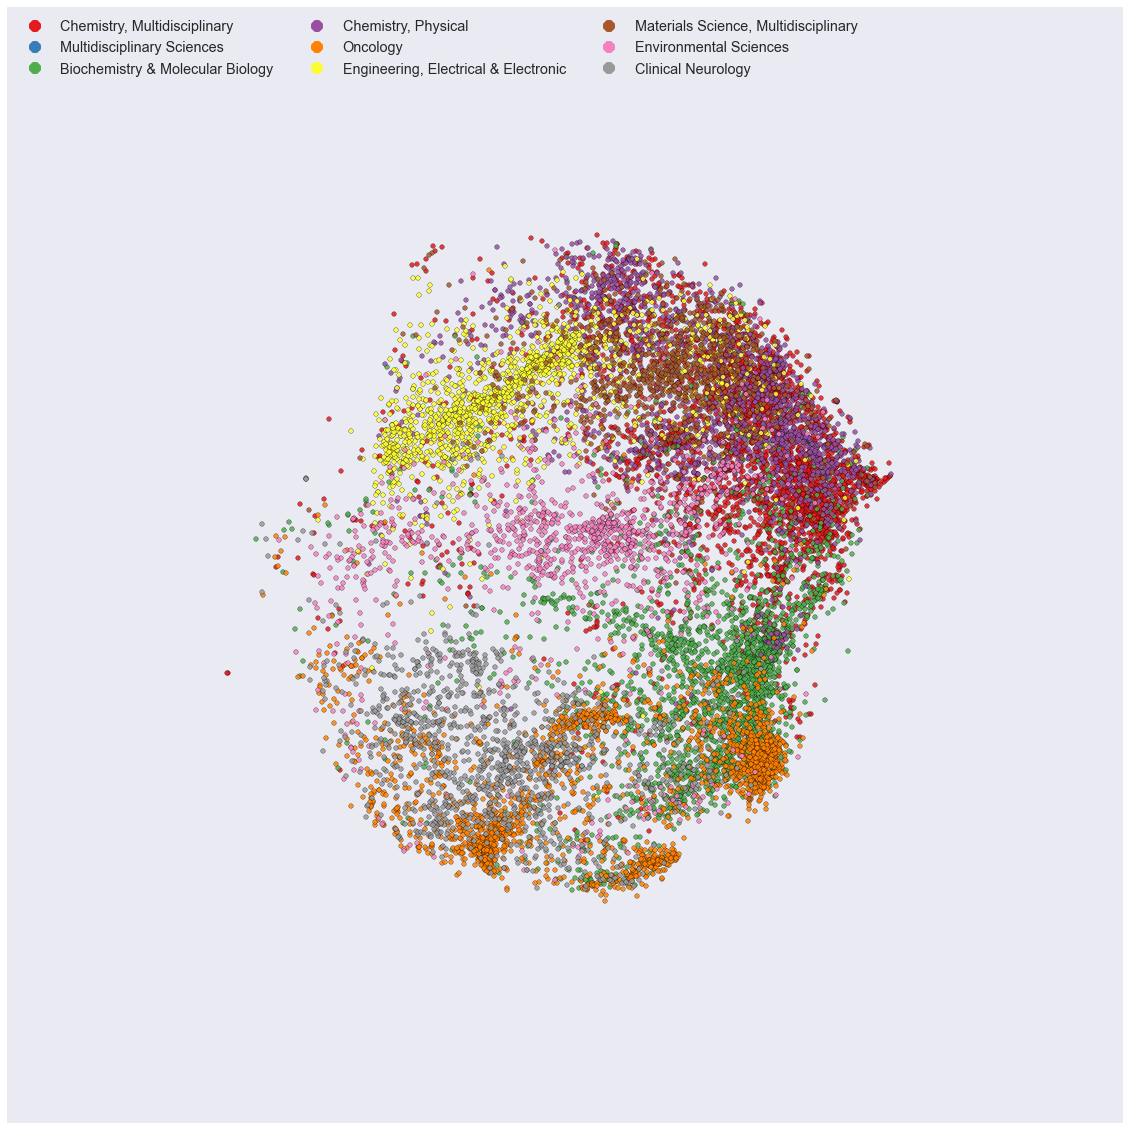

In [234]:
plt_df = df_xnorm.dropna()
fig,ax = plt.subplots(1,1,figsize=(20,20))
markers = ['.','*']
marker_idx=0
for i,g in enumerate(values):
    if (i%9==0) and (i>0):
        marker_idx+=1
    ax.scatter(plt_df[plt_df['first_cat']==g]['x'],plt_df[plt_df['first_cat']==g]['y'],c=color_dict[g],s=85,alpha=.85,edgecolors=None,marker=markers[marker_idx])
    legend_line_1 = ax.plot(np.NaN, np.NaN, marker = markers[marker_idx], ls='',ms=25, label=g, color=color_dict[g],lw=1)
    
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.set_xlim(-35,35)
ax.set_ylim(-35,35)

ax.legend(loc='upper left',ncol=3,fontsize='x-large')
ax.grid()